File1 Columns: ['PROJECT NO', 'NAME', 'SECTOR', 'CLASSIFICATION GROUP', 'LOAN OUTSTANDING (Rs.)', 'IRAC CLASSIFICATION (31.03.2025)', 'SMA (as on 31.03.2025)', 'Asset Classification as on 30.06.2025', 'SMA Staging as on 30.06.2025)', 'Receipt During Quarter 1 (in Lakhs)', '.', 'Unnamed: 11', 'Unnamed: 12']
File2 Columns: ['PROJECT NO', 'NAME', 'Sector', 'Asset classification', 'LOAN OUTSTANDING (Rs.)', 'IRAC CLASSIFICATION', 'SMA']


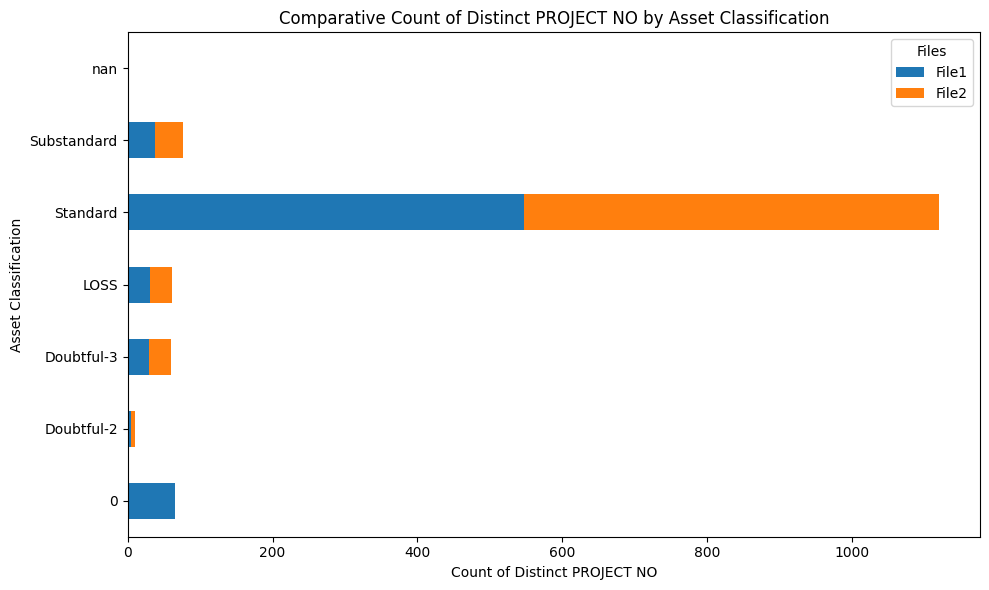

,File1,File2
Asset Classification,,
0,65,0
Doubtful-2,5,5
Doubtful-3,30,30
LOSS,31,31
Standard,547,573
Substandard,38,39
nan,1,0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_project_counts(file1: str, file2: str, sheet_name=0):
    """
    Compare two Excel files and plot a stacked bar chart showing 
    count of distinct PROJECT NO by Asset Classification.
    """

    # Read Excel files with specific headers
    df1 = pd.read_excel(file1, sheet_name=sheet_name, header=1)
    df2 = pd.read_excel(file2, sheet_name=sheet_name, header=2)

    # Debug columns
    print("File1 Columns:", df1.columns.tolist())
    print("File2 Columns:", df2.columns.tolist())

    # Normalize classification column names
    if "Asset Classification as on 30.06.2025" in df1.columns:
        df1.rename(columns={"Asset Classification as on 30.06.2025": "Asset Classification"}, inplace=True)
    if "Asset classification" in df2.columns:
        df2.rename(columns={"Asset classification": "Asset Classification"}, inplace=True)

    # Convert PROJECT NO and Asset Classification to string
    df1["PROJECT NO"] = df1["PROJECT NO"].astype(str).str.strip()
    df2["PROJECT NO"] = df2["PROJECT NO"].astype(str).str.strip()

    df1["Asset Classification"] = df1["Asset Classification"].astype(str).str.strip()
    df2["Asset Classification"] = df2["Asset Classification"].astype(str).str.strip()

    # Group by without sorting (avoid str vs int comparison)
    counts1 = df1.groupby("Asset Classification", sort=False)["PROJECT NO"].nunique()
    counts2 = df2.groupby("Asset Classification", sort=False)["PROJECT NO"].nunique()

    # Combine into one DataFrame
    comparison = pd.DataFrame({
        "File1": counts1,
        "File2": counts2
    }).fillna(0).astype(int)

    # # Plot stacked bar chart
    # comparison.plot(kind="bar", stacked=True, figsize=(10, 6))
    # plt.title("Comparative Count of Distinct PROJECT NO by Asset Classification")
    # plt.xlabel("Asset Classification")
    # plt.ylabel("Count of Distinct PROJECT NO")
    # plt.xticks(rotation=45, ha="right")
    # plt.legend(title="Files")
    # plt.tight_layout()
    # plt.show()
    
    # Plot stacked horizontal bar chart (transpose view)
    comparison.plot(kind="barh", stacked=True, figsize=(10, 6))

    plt.title("Comparative Count of Distinct PROJECT NO by Asset Classification")
    plt.xlabel("Count of Distinct PROJECT NO")   # X is now count
    plt.ylabel("Asset Classification")           # Y is now classification
    plt.legend(title="Files")
    plt.tight_layout()
    plt.show()

    return comparison




compare_project_counts("Loan Book (31.03.2025).xlsx", "Loan Book (30.06.2025).xlsx")


In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 17.3 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 11.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 9.3 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 8.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 4.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 4.6 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pypars


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import altair as alt

def compare_project_counts_altair(file1: str, file2: str, sheet_name=0):
    """
    Compare two Excel files and plot a stacked horizontal bar chart using Altair,
    showing count of distinct PROJECT NO by Asset Classification.
    """

    # Read Excel files with specific headers
    df1 = pd.read_excel(file1, sheet_name=sheet_name, header=1)
    df2 = pd.read_excel(file2, sheet_name=sheet_name, header=2)

    # Normalize classification column names
    if "Asset Classification as on 30.06.2025" in df1.columns:
        df1.rename(columns={"Asset Classification as on 30.06.2025": "Asset Classification"}, inplace=True)
    if "Asset classification" in df2.columns:
        df2.rename(columns={"Asset classification": "Asset Classification"}, inplace=True)

    # Convert PROJECT NO and Asset Classification to string
    df1["PROJECT NO"] = df1["PROJECT NO"].astype(str).str.strip()
    df2["PROJECT NO"] = df2["PROJECT NO"].astype(str).str.strip()
    df1["Asset Classification"] = df1["Asset Classification"].astype(str).str.strip()
    df2["Asset Classification"] = df2["Asset Classification"].astype(str).str.strip()

    # Group by classification
    counts1 = df1.groupby("Asset Classification", sort=False)["PROJECT NO"].nunique()
    counts2 = df2.groupby("Asset Classification", sort=False)["PROJECT NO"].nunique()

    # Combine into tidy DataFrame for Altair
    comparison = pd.DataFrame({
        "File1": counts1,
        "File2": counts2
    }).fillna(0).astype(int).reset_index()

    # Melt to long format for Altair
    comparison_long = comparison.melt(
        id_vars="Asset Classification",
        value_vars=["File1", "File2"],
        var_name="File",
        value_name="Count"
    )

    # Altair stacked horizontal bar chart
    chart = (
        alt.Chart(comparison_long)
        .mark_bar()
        .encode(
            x=alt.X("Count:Q", title="Count of Distinct PROJECT NO"),
            y=alt.Y("Asset Classification:N", sort=None, title="Asset Classification", axis=alt.Axis(labelAngle=0)),
            color=alt.Color("File:N", title="Source File"),
            tooltip=["Asset Classification", "Count", "File"],
        )
        .properties(height=400)
    )

    return chart

compare_project_counts_altair("Loan Book (31.03.2025).xlsx", "Loan Book (30.06.2025).xlsx")


alt.Chart(...)

In [17]:
import pandas as pd
import altair as alt

def compare_project_counts_altair2(file1: str, file2: str, sheet_name=0):
    """
    Compare two Excel files and plot a grouped horizontal bar chart using Altair,
    showing count of distinct PROJECT NO by Asset Classification.
    """

    # Read Excel files with specific headers
    df1 = pd.read_excel(file1, sheet_name=sheet_name, header=1)
    df2 = pd.read_excel(file2, sheet_name=sheet_name, header=2)

    # Normalize classification column names
    if "Asset Classification as on 30.06.2025" in df1.columns:
        df1.rename(columns={"Asset Classification as on 30.06.2025": "Asset Classification"}, inplace=True)
    if "Asset classification" in df2.columns:
        df2.rename(columns={"Asset classification": "Asset Classification"}, inplace=True)

    # Convert PROJECT NO and Asset Classification to string
    df1["PROJECT NO"] = df1["PROJECT NO"].astype(str).str.strip()
    df2["PROJECT NO"] = df2["PROJECT NO"].astype(str).str.strip()
    df1["Asset Classification"] = df1["Asset Classification"].astype(str).str.strip()
    df2["Asset Classification"] = df2["Asset Classification"].astype(str).str.strip()

    # Group by classification
    counts1 = df1.groupby("Asset Classification", sort=False)["PROJECT NO"].nunique()
    counts2 = df2.groupby("Asset Classification", sort=False)["PROJECT NO"].nunique()

    # Combine into tidy DataFrame for Altair
    comparison = pd.DataFrame({
        "File1": counts1,
        "File2": counts2
    }).fillna(0).astype(int).reset_index()

    # Melt to long format for Altair
    comparison_long = comparison.melt(
        id_vars="Asset Classification",
        value_vars=["File1", "File2"],
        var_name="File",
        value_name="Count"
    )

    # Altair grouped horizontal bar chart
    chart = (
        alt.Chart(comparison_long)
        .mark_bar()
        .encode(
            x=alt.X("Count:Q", title="Count of Distinct PROJECT NO"),
            y=alt.Y("Asset Classification:N", sort=None, title="Asset Classification", axis=alt.Axis(labelAngle=0)),
            color=alt.Color("File:N", title="Source File"),
            column=alt.Column("File:N", title=None)  # side-by-side grouping
        )
        .properties(height=400)
    )

    return chart
compare_project_counts_altair2("Loan Book (31.03.2025).xlsx", "Loan Book (30.06.2025).xlsx")

alt.Chart(...)

In [18]:
import pandas as pd
import altair as alt

def compare_project_counts_dumbbell(file1: str, file2: str, sheet_name=0):
    """
    Compare two Excel files and plot a dumbbell chart showing 
    distinct PROJECT NO counts per Asset Classification.

    Args:
        file1 (str): Path to first Excel file (header at row 1)
        file2 (str): Path to second Excel file (header at row 2)
        sheet_name (str/int): Sheet name or index (default = 0)
    """

    # Read Excel files with specific headers
    df1 = pd.read_excel(file1, sheet_name=sheet_name, header=1)
    df2 = pd.read_excel(file2, sheet_name=sheet_name, header=2)

    # Normalize classification column names
    if "Asset Classification as on 30.06.2025" in df1.columns:
        df1.rename(columns={"Asset Classification as on 30.06.2025": "Asset Classification"}, inplace=True)
    if "Asset classification" in df2.columns:
        df2.rename(columns={"Asset classification": "Asset Classification"}, inplace=True)

    # Group by Asset Classification and count distinct PROJECT NO
    counts1 = df1.groupby("Asset Classification")["PROJECT NO"].nunique().reset_index()
    counts1.rename(columns={"PROJECT NO": "Count"}, inplace=True)
    counts1["File"] = "File1"

    counts2 = df2.groupby("Asset Classification")["PROJECT NO"].nunique().reset_index()
    counts2.rename(columns={"PROJECT NO": "Count"}, inplace=True)
    counts2["File"] = "File2"

    # Combine both into one dataframe
    comparison = pd.concat([counts1, counts2], ignore_index=True)

    # Dumbbell chart: one line per category with two dots
    base = alt.Chart(comparison).encode(
        y=alt.Y("Asset Classification:N", sort="-x", title="Asset Classification")
    )

    # Line connecting the two points
    lines = base.mark_rule().encode(
        x="min(Count):Q",
        x2="max(Count):Q"
    )

    # Dots for File1 & File2
    points = base.mark_point(size=100, filled=True).encode(
        x="Count:Q",
        color=alt.Color("File:N", legend=alt.Legend(title="Files")),
        tooltip=["Asset Classification", "File", "Count"]
    )

    chart = (lines + points).properties(
        title="Dumbbell Chart: Distinct PROJECT NO by Asset Classification",
        height=400,
        width=600
    )

    chart.show()
    return comparison


# Example usage
compare_project_counts_dumbbell("Loan Book (31.03.2025).xlsx", "Loan Book (30.06.2025).xlsx")


alt.LayerChart(...)

,Asset Classification,Count,File
0,0,65,File1
1,Doubtful-2,5,File1
2,Doubtful-3,30,File1
3,LOSS,31,File1
4,Standard,547,File1
5,Substandard,38,File1
6,Doubtful-2,5,File2
7,Doubtful-3,30,File2
8,LOSS,31,File2
9,Standard,573,File2


In [19]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.8 MB 14.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 14.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 8.3 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.8 MB 7.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 6.3 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 5.7 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import plotly.express as px
import streamlit as st

def compare_project_counts_plotly(file1: str, file2: str, sheet_name=0):
    """
    Compare two Excel files and plot a modern interactive horizontal bar chart
    showing count of distinct PROJECT NO by Asset Classification using Plotly.
    """

    # Read Excel files with specific headers
    df1 = pd.read_excel(file1, sheet_name=sheet_name, header=1)
    df2 = pd.read_excel(file2, sheet_name=sheet_name, header=2)

    # Normalize classification column names
    if "Asset Classification as on 30.06.2025" in df1.columns:
        df1.rename(columns={"Asset Classification as on 30.06.2025": "Asset Classification"}, inplace=True)
    if "Asset classification" in df2.columns:
        df2.rename(columns={"Asset classification": "Asset Classification"}, inplace=True)

    # Convert PROJECT NO and Asset Classification to string
    df1["PROJECT NO"] = df1["PROJECT NO"].astype(str).str.strip()
    df2["PROJECT NO"] = df2["PROJECT NO"].astype(str).str.strip()
    df1["Asset Classification"] = df1["Asset Classification"].astype(str).str.strip()
    df2["Asset Classification"] = df2["Asset Classification"].astype(str).str.strip()

    # Group by classification
    counts1 = df1.groupby("Asset Classification")["PROJECT NO"].nunique()
    counts2 = df2.groupby("Asset Classification")["PROJECT NO"].nunique()

    # Combine into tidy DataFrame
    comparison = pd.DataFrame({
        "File1": counts1,
        "File2": counts2
    }).fillna(0).astype(int).reset_index()

    # Melt to long format for Plotly
    comparison_long = comparison.melt(
        id_vars="Asset Classification",
        value_vars=["File1", "File2"],
        var_name="File",
        value_name="Count"
    )

    # Create interactive horizontal grouped bar chart
    fig = px.bar(
        comparison_long,
        x="Count",
        y="Asset Classification",
        color="File",
        barmode="group",  # options: 'stack' or 'group'
        text="Count",
        orientation="h",
        height=500,
        labels={"Count": "Count of Distinct PROJECT NO", "Asset Classification": "Asset Classification"},
        title="Comparative Count of Distinct PROJECT NO by Asset Classification"
    )

    fig.update_layout(
        template="plotly_white",
        xaxis=dict(title="Count of Distinct PROJECT NO"),
        yaxis=dict(title="Asset Classification", automargin=True),
        legend_title_text="Source File",
        uniformtext_minsize=8,
        uniformtext_mode="hide"
    )

    fig.update_traces(textposition="outside")

    # Show in Streamlit
    st.plotly_chart(fig, use_container_width=True)

    return fig
compare_project_counts_plotly("Loan Book (31.03.2025).xlsx", "Loan Book (30.06.2025).xlsx")


2025-09-24 01:16:38.782 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 01:16:38.783 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 01:16:38.785 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 01:16:39.549 
  command:

    streamlit run C:\Users\CAP-016\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-24 01:16:39.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 01:16:39.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
